# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction

If the officer and complaintant are not the same ethnicity, does the number of complaints increase in comparison to if they are the same ethnicity?

There are a lot of known cases which police-officers are more likely to be forcible against civilians who have different ethnicity such as George Floyd case. The dataset 'allegations_202007271729' contains informations of that the complanints of civilians against police officer of NYPD. Every row in dataset have informations of complainants and police officers such as ethnicity, age, gender, reason and time of complaints was made. To check whether the question above is true or not, I want to find out relationship between the ethnicity of complainants and ethnicity of police officers. Furthermore, I would be able to find out which race of the complainants made more complaints toward police officers who have different ethnicity.

For examining my queries, I would focus on specific columns, 'mos_ethnicity' (police officers' race), 'complainant_ethnicity' (complainants' race), to find out the realtionship between complainants and police officers.

### Cleaning and EDA
In the dataset, the column, 'complainant_ethnicity' contains missing values, 'unknown' and 'refused'. Therefore, I change the missing values to nan to describe that complainants who didn't report their races.

The first bar graph represents that the counts of ethnicities of complainants. I can tell that black civilians are more likely to report complaints. 

The second bar graph represents that the counts of ethnicities of police officers. I use the column 'month_received' because it does not include any missing value to count ethnicities of police officers. I can tell that white police officers are more likely to be reported for complaints. 

The third bar graph represents that the counts of ethnicities of complainants on each ethnicity of police officers. I can tell that black civilians are more likely to report complaints about all the cases of the race of police officers.

According to the graphs, I can assume that black civilians are the most ones which made complaints on police officers of NYPD for all cases of ethnicities of police officers.

### Assessment of Missingness
I think that missingness of 'complainant_ethnicity' would be NMAR. Some complainants doesn't want to report their races since police officers will see the complainant's race and might develop racism toward complainant's ethinic.

The dataset contains both categorical and quantitative columns. To perform permutation test for missingness of 'complainant_ethnicity' on both categorical and quantitive columns, I use total variance distance to perform categorical columns and use kolmogorov-smirnov for quantitative columns.

After the permutation test for missingness of 'complainant_ethnicity', every columns' p-values are less than significance level (0.05) so I can conclude that missingness of 'complainant_ethnicity' depends on the all other columns heavily. Thus, my first assumtion was wrong and 'complainant_ethnicity' is not NMAR. However, I have to find at least one column for which missingness is dependent and one for which missingness is not dependent to get the credit. Thus, I had to see other column to do permutation test.

Since the column 'complainant_ethnicity' depends on the all other columns, I try to find other column which has at least one column for which missingness is dependent and one for which missingness is not dependent. I found other column 'contact_reason' which might not be NMAR since it may depends on other columns such as 'outcome_description'. If a person who didn't get arrested in 'outcome_description', then there might be no reason to contact by police officers. Thus, it might be MAR. 

The permutation test perform same as I do for 'complainant_ethnicity'. For categorical columns, I use tvd method to perform permutation test and for quantitative columns, I use kolmogorov-smirnov method to perform permutation test.

I made dataframe of p-value of each columns and as you can see that some of p-values, suchs as for 'outcome_description', 'allegation' and etc, are less than significance level 0.05 and other p-values, such as 'mos_gender', 'mos_ethnicity' are greater than 0.05.

Since the p-value for 'outcome_description' is less than significance level, I can tell that missingness of 'contact_reason' depends on the 'outcome_description' as I thought. On the other hand, p-value for 'mos_gender'	is greater than significance level (0.770 > 0.05), so I can tell that the missingess of 'contact_reason' does not depends on 'mos_gender' which make sense that the gender of police officer and missingness of 'contact_reason' would not be significant related. 

To conclude, if my query requires to use 'contact_reason' column, then my answer would be incorrect since there is dependency between 'contact_reason' column with other columns such as 'outcome_description'. Since my question, "If the officer and complaintant are not the same ethnicity, does the number of complaints increase in comparison to if they are the same ethnicity?", requires to use 'complainant_ethinicity' and 'mos_ethinicity' so that my answer might be incorrect since the missingness of 'complainant_ethinicity' heavily depends on 'mos_ethinicity' with p-value = 0.0.

### Hypothesis Test
While doing the cleaning and EDA part, I could see that the number of black civilians' complaints is much more than other race civilians' complaints on every case of the ethnicity of police officers. Thus, one question appears that there will be probably more complaints when police officer investigates civilian whose race is black.

Null Hypothesis would be that the number of complaints along the ethnicity of complainants are equally distributed as race distribution in New york.

Alternative Hypothesis would be that number of complaints along the ethnicity of complainants are not equally distributed as race distribution in New York.

I would use total variation distance to do my hypothesis test. 

First, I found data of population race distribution in New York from https://worldpopulationreview.com/us-cities/new-york-city-ny-population.

My test statistic is total variation distance between population race diversity distribution in New York and ethnicity distribution of complaints in the dataset.

significant level and result of the p-value = 0.05, 0.0

To conclude, The p-value is 0.0 which is not larger than 0.05, I can reject the null hypothesis and accept the alternative hypothesis.
As a result, I can tell that the number of complaints along the ethnicity of complainants are not equally distributed as race distribution in New York and furthermore, the number of complaints is heavily dependent on the ethinicity of complainants.

# Code

In [80]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [5]:
# call data
nypd = pd.read_csv('allegations_202007271729.csv')

# see the columns
nypd.columns

# to check whether there are missing values in the column
nypd['complainant_ethnicity'].unique()
nypd['mos_ethnicity'].unique()

# missing values in complainant_ethnicity : Refused, Unknown

# change the missing values to nan
nypd['complainant_ethnicity'] = nypd['complainant_ethnicity'].replace({'Refused': np.nan, 'Unknown': np.nan})

### complainant race counts

Text(0, 0.5, 'Count')

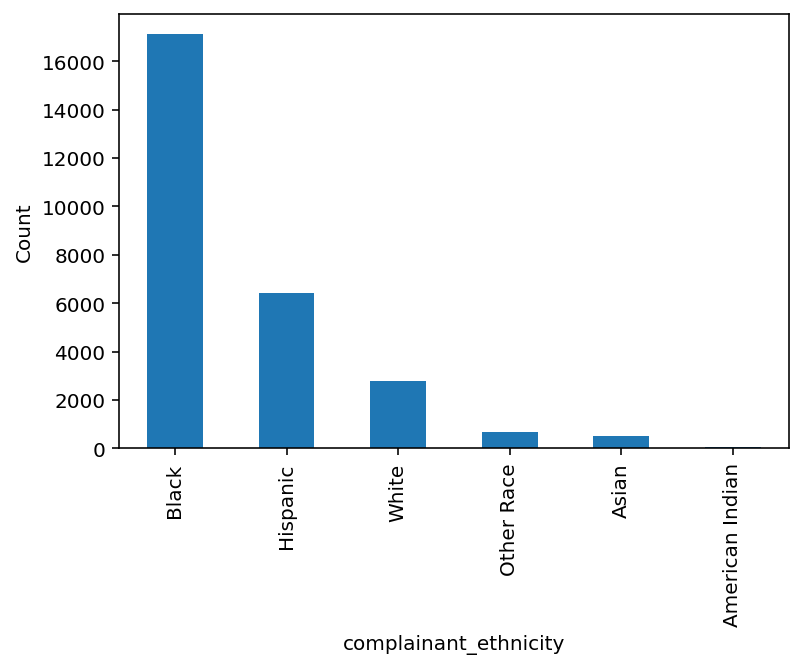

In [6]:
nypd['complainant_ethnicity'].value_counts().plot(kind = 'bar')
plt.xlabel('complainant_ethnicity')
plt.ylabel('Count')

### police officer race counts

Text(0, 0.5, 'Count')

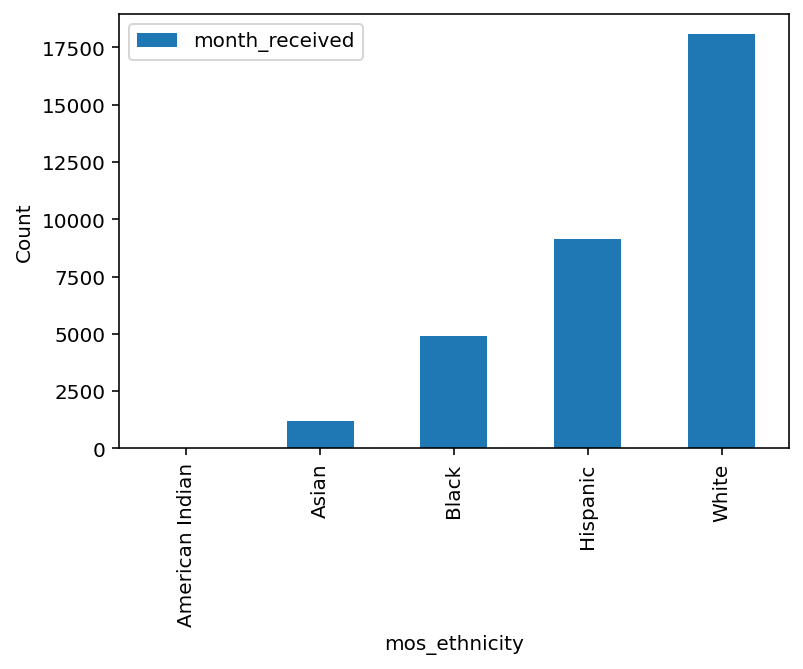

In [7]:
# check the counts for each race of police officers
nypd.groupby('mos_ethnicity').agg({'month_received': 'count'}).plot(kind = 'bar')
plt.xlabel('mos_ethnicity')
plt.ylabel('Count')

### complainant race on each police officers race

In [8]:
race_on_each_police = nypd.pivot_table(index = 'mos_ethnicity', columns = 'complainant_ethnicity', values = 'month_received',aggfunc = 'count')
race_on_each_police = race_on_each_police.fillna(0)
race_on_each_police

complainant_ethnicity,American Indian,Asian,Black,Hispanic,Other Race,White
mos_ethnicity,,,,,,
American Indian,0.0,0.0,18.0,2.0,6.0,2.0
Asian,2.0,61.0,558.0,236.0,19.0,129.0
Black,4.0,58.0,2846.0,709.0,98.0,380.0
Hispanic,8.0,96.0,4722.0,2215.0,187.0,625.0
White,50.0,317.0,8970.0,3262.0,367.0,1647.0


Text(0.5, 0, 'mos_ethnicity')

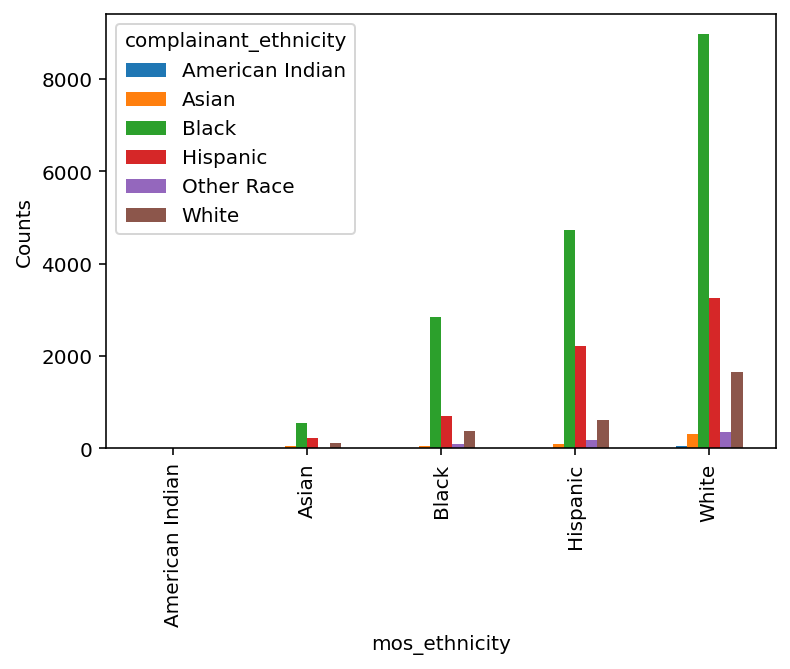

In [9]:
race_on_each_police.plot(kind = 'bar')
plt.ylabel('Counts')
plt.xlabel('mos_ethnicity')

### Assessment of Missingness

### permutation test functions for categorical case and quantitative case

In [205]:
# permutation test for categorical columns using tvd
def permutation_categorical(nypd, missing_value_column, other_column):
    df = nypd.copy()
    missing_value_boolean = nypd[missing_value_column].isna()
    df['is_null'] = missing_value_boolean
    
    distr = df.pivot_table(index = 'is_null', columns = other_column, aggfunc = 'size').apply(lambda x: x / x.sum(), axis = 1)
    distr = distr.fillna(0)
    obs_tvd = distr.diff().iloc[-1].abs().sum()/2

    tvds = []
    for _ in range(1000):
    
        # shuffle the gender column
        shuffled_col = (df[other_column].sample(replace=False, frac=1).reset_index(drop=True))
    
        # put them in a table
        df = (df.assign(**{'shuffled_col': shuffled_col}))
    
        # compute the tvd
        shuffled = (df.pivot_table(index='is_null', columns='shuffled_col', aggfunc='size').apply(lambda x:x / x.sum(), axis=1))
        shuffled = shuffled.fillna(0)
        tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    
        # add it to the list of results
        tvds.append(tvd)
    
    pvalue = (pd.Series(tvds) >= obs_tvd).mean()

    return pvalue

In [197]:
#permutation test for quantitative columns using ks
def permutaion_quantitative(nypd, missing_value_column, other_column):
    df = nypd.copy()
    df['is_null'] = df[missing_value_column].isna()
    
    ks_lst = []
    grouped = df.groupby('is_null')[other_column]
    obs = ks_2samp(grouped.get_group(True), grouped.get_group(False)).statistic
    
    for _ in range(1000):
        # shuffle the gender column
        shuffled_col = (df[other_column].sample(replace=False, frac=1).reset_index(drop=True))
        
        # put them in a table
        df = (df.assign(**{'shuffled_col': shuffled_col}))
        
        # group by shuffled
        grouped_shuffled = df.groupby('is_null')['shuffled_col']
        
        ks = ks_2samp(grouped_shuffled.get_group(True), grouped_shuffled.get_group(False)).statistic
        ks_lst.append(ks)
    p_val = (np.array(ks_lst) > obs).mean()
    return p_val

### to show in dataframe

In [198]:
quantitative = ['year_received', 'year_closed', 'mos_age_incident', 'complainant_age_incident']
categorical = []
for i in nypd.columns:
    if i in quantitative:
        continue;
    else:
        categorical.append(i)
dict_nypd = {}
for i in nypd.columns:
    dict_nypd[i] = 0.000
pval_df = pd.Series(dict_nypd).to_frame()

pval_df = pval_df.rename(columns = {0:'p-val'})

### for complainants_ethnicity permutation test

In [201]:
pval_df_ethnicity = pval_df.copy()
# permutation test of missingness for categorical columns
for i in nypd.columns:
    if ((i not in quantitative)):
        p_val = permutation_categorical(nypd, 'complainant_ethnicity', i)
        pval_df_ethnicity['p-val'][i] = p_val

In [202]:
# permutation test of missingness for qualitative columns with ks method
for j in quantitative:
    p_value = permutaion_quantitative(nypd, 'complainant_ethnicity', j)
    pval_df_ethnicity['p-val'][j] = p_val

In [203]:
# df.drop(index='cow', columns='small')
pval_df_ethnicity.drop(index = 'complainant_ethnicity')

,p-val
unique_mos_id,0.000
first_name,0.000
last_name,0.000
command_now,0.000
shield_no,0.000
complaint_id,0.000
month_received,0.001
year_received,0.000
month_closed,0.000
year_closed,0.000


### for contact_reason permutation test

In [166]:
pval_df_contact_reason = pval_df.copy()
# permutation test of missingness for categorical columns
for i in nypd.columns:
    if ((i not in quantitative)):
        p_val = permutation_categorical(nypd, 'contact_reason', i)
        pval_df_contact_reason['p-val'][i] = p_val
# permutation test of missingness for qualitative columns with ks method
for j in quantitative:
    p_value = permutaion_quantitative(nypd, 'contact_reason', j)
    pval_df_contact_reason['p-val'][j] = p_val

In [167]:
pval_df_contact_reason.drop('contact_reason')

,p-val
unique_mos_id,0.000
first_name,0.000
last_name,0.000
command_now,0.000
shield_no,0.018
complaint_id,0.000
month_received,0.000
year_received,0.254
month_closed,0.000
year_closed,0.254


### Hypothesis Test

In [11]:
# create population distribution
d = {'American Indian': 0.0017, 'Asian': 0.1397, 'Black': 0.2182, 'Hispanic': 0.291, 'Other Race': 0.0284, 'White': 0.321}
population_distribution_series = pd.Series(data = d, index = ['American Indian', 'Asian', 'Black', 'Hispanic', 'Other Race', 'White'])
population_distribution_series

American Indian    0.0017
Asian              0.1397
Black              0.2182
Hispanic           0.2910
Other Race         0.0284
White              0.3210
dtype: float64

### distribution of New York City for complainants and population

In [12]:
# append population distribution to the complainants distribution
grouped_race_complaints = nypd.groupby('complainant_ethnicity').agg({'month_received': 'count'})
grouped_race_complaints['complaints_distribution'] = grouped_race_complaints['month_received'] / grouped_race_complaints['month_received'].sum(axis = 0)
grouped_race_complaints['population_distribution'] = population_distribution_series
grouped_race_complaints = grouped_race_complaints.drop('month_received', axis = 1)
grouped_race_complaints

,complaints_distribution,population_distribution
complainant_ethnicity,,
American Indian,0.002319,0.0017
Asian,0.019280,0.1397
Black,0.620207,0.2182
Hispanic,0.232804,0.2910
Other Race,0.024534,0.0284
White,0.100855,0.3210


### total variance distribution function

In [13]:
# function of tvd
def tvd(first_d, second_d):
    return sum(abs(first_d - second_d)) / 2

### hypothesis test and p-value

In [15]:
# test statistic (tvd) between complainants and population
test_stat = tvd(grouped_race_complaints['complaints_distribution'], grouped_race_complaints['population_distribution'])

# races of the complainants without nan value
races = np.delete(nypd['complainant_ethnicity'].unique(), 1).copy()
# make races to same order as index of grouped distribution dataframe
races.sort()
lst = []

# perform hypothesis test
for i in range(1000):
    shuffled = np.random.choice(races, len(nypd['complainant_ethnicity'].dropna()),p = grouped_race_complaints['population_distribution'])
    shuffled_series = pd.Series(shuffled)
    grouped_race_complaints['shuffled_distribution'] = shuffled_series.value_counts() / len(shuffled)
    shuffled_tvd = tvd(grouped_race_complaints['shuffled_distribution'], grouped_race_complaints['population_distribution'])
    lst.append(shuffled_tvd)

p_value = (np.array(lst) > test_stat).mean()
p_value

0.0